In [1]:
from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, X_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


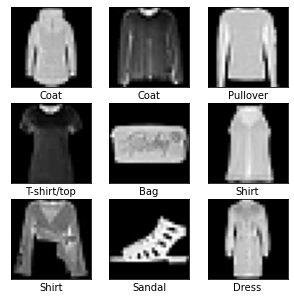

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])
plt.show()

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
from tensorflow.keras.utils import to_categorical
# 실제 정답 비교를 위해 0 ~ 9 정답지를 따로 저장
real_y_test = y_test

# 레이블 데이터를 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# 3) 훈련 / 검증 데이터를 70:30 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=777)
X_train.shape

(42000, 28, 28)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape=(28,28))) # Flatten(28,28) -> (28*28) -> 1차원 784로 변환
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [7]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [8]:
first_history = first_model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/30
329/329 [==============================] - 1s 2ms/step - loss: 0.6850 - acc: 0.7656 - val_loss: 0.4661 - val_acc: 0.8362
Epoch 2/30
329/329 [==============================] - 0s 1ms/step - loss: 0.4477 - acc: 0.8411 - val_loss: 0.4305 - val_acc: 0.8484
Epoch 3/30
329/329 [==============================] - 0s 1ms/step - loss: 0.4040 - acc: 0.8550 - val_loss: 0.3948 - val_acc: 0.8622
Epoch 4/30
329/329 [==============================] - 0s 1ms/step - loss: 0.3765 - acc: 0.8649 - val_loss: 0.3821 - val_acc: 0.8673
Epoch 5/30
329/329 [==============================] - 0s 1ms/step - loss: 0.3597 - acc: 0.8709 - val_loss: 0.3650 - val_acc: 0.8691
Epoch 6/30
329/329 [==============================] - 0s 1ms/step - loss: 0.3434 - acc: 0.8755 - val_loss: 0.3776 - val_acc: 0.8643
Epoch 7/30
329/329 [==============================] - 0s 1ms/step - loss: 0.3312 - acc: 0.8802 - val_loss: 0.3456 - val_acc: 0.8766
Epoch 8/30
329/329 [==============================] - 0s 1ms/step - loss: 0.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

second_model = Sequential()
second_model.add(Flatten(input_shape=(28,28))) # Flatten(28,28) -> (28*28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu')) # 층 하나 추가
second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax'))

second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

second_history = second_model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 2ms/step - loss: 0.6194 - acc: 0.7860 - val_loss: 0.4465 - val_acc: 0.8433
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4215 - acc: 0.8515 - val_loss: 0.3927 - val_acc: 0.8641
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3738 - acc: 0.8649 - val_loss: 0.3730 - val_acc: 0.8699
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3499 - acc: 0.8727 - val_loss: 0.3605 - val_acc: 0.8718
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3294 - acc: 0.8792 - val_loss: 0.3693 - val_acc: 0.8657
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3089 - acc: 0.8847 - val_loss: 0.3466 - val_acc: 0.8712
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.2911 - acc: 0.8921 - val_loss: 0.3239 - val_acc: 0.8850
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.

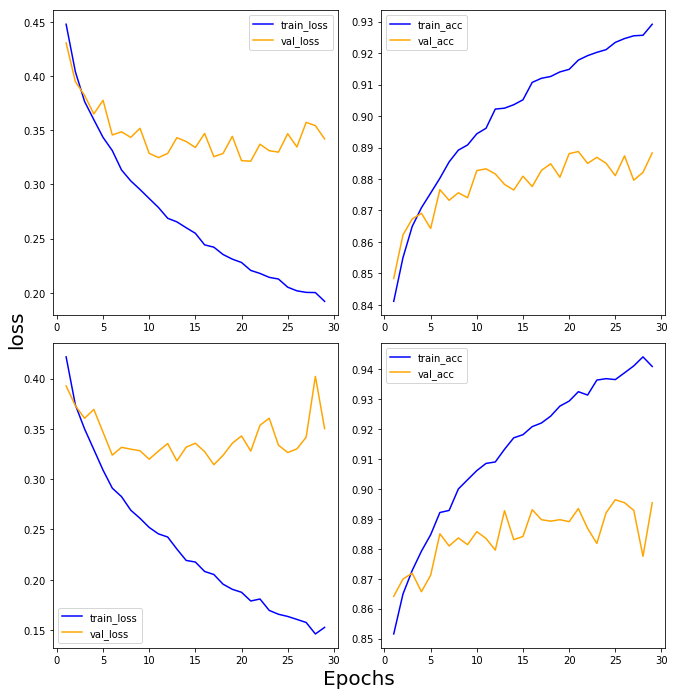

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)

In [11]:
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 742us/step - loss: 0.3973 - acc: 0.8817


[0.39729613065719604, 0.8816999793052673]

In [1]:
import numpy as np

results = first_model.predict(X_test)
arg_results = np.argmax(results, axis = -1)

random_idx = np.random.randint(10000)

plt.figure(figsize=(5,5))

plt.imshow(X_test[random_idx], cmap='gray')
plt.title('Predicted value of the image : ' + class_names[arg_results[random_idx]] + ', Real value of the image :' + class_names[real_y_test[random_idx]])
plt.show()

NameError: name 'first_model' is not defined

313/313 [==============================] - 0s 571us/step


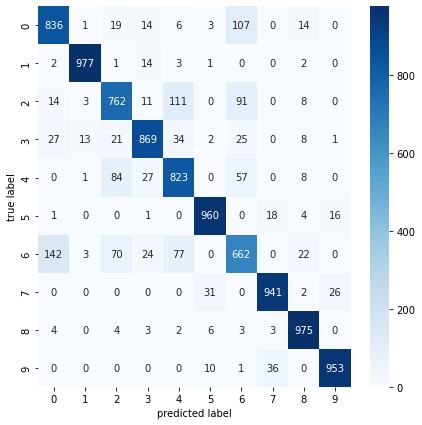

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
results = first_model.predict(X_test)

plt.figure(figsize=(7,7))

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)) # 실제 정답과 비교
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()